In [1]:
import pandas as pd
import numpy as np

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [11]:
# load dataset
housing = pd.read_csv("housing.csv")
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


1. Data Preprocessing

Handling Missing values

In [13]:
# Inspect missing values in each column
missing_values = housing.isnull().sum()
missing_values_percentage = (missing_values / len(housing)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})

missing_values_summary.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


In [ ]:
# there are no missing values in the dataset

Outliers

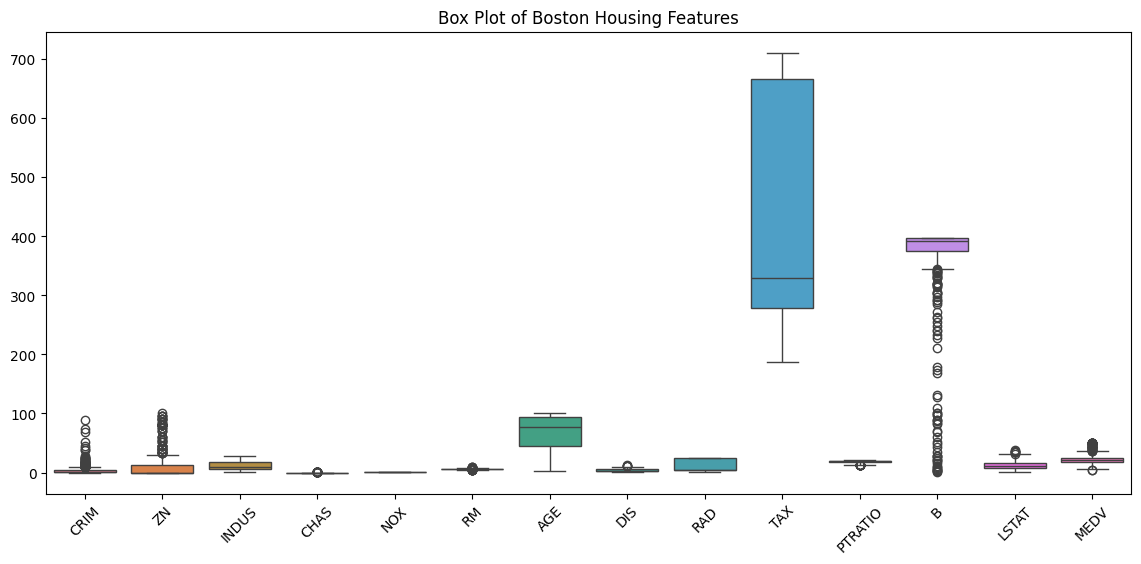

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=housing)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title('Box Plot of Boston Housing Features')
plt.show()

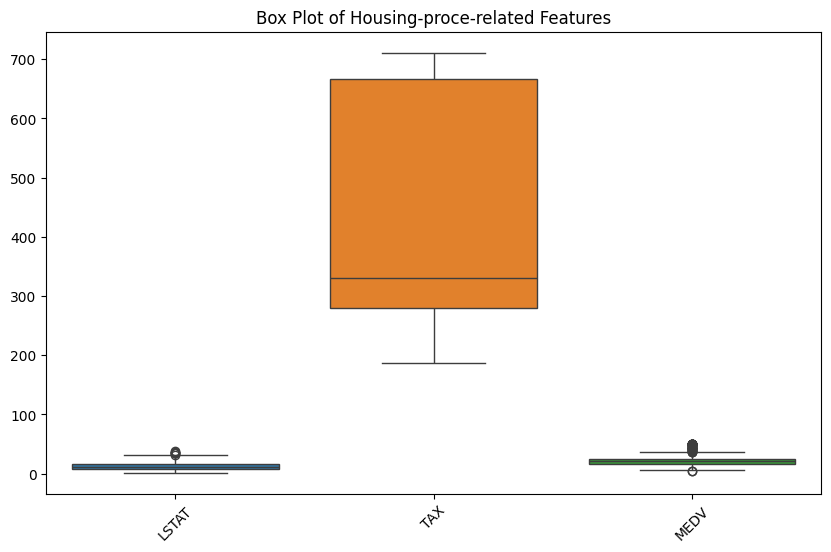

In [17]:
# features of prices
price_features = ['LSTAT', 'TAX', 'MEDV']

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing[price_features])
plt.xticks(rotation=45)
plt.title('Box Plot of Housing-proce-related Features')
plt.show()

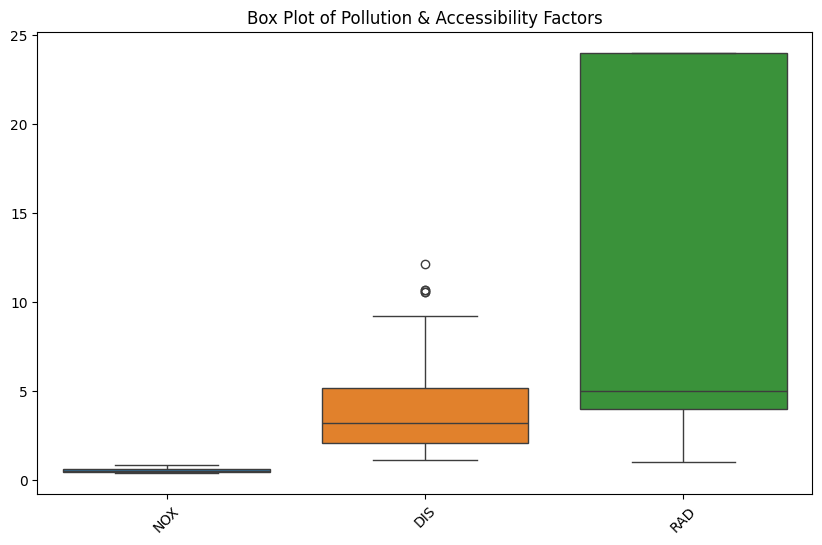

In [18]:
# features of pollution & distances
other_features = ['NOX', 'DIS', 'RAD']

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing[other_features])
plt.xticks(rotation=45)
plt.title('Box Plot of Pollution & Accessibility Factors')
plt.show()

In [19]:
import numpy as np

# Apply log transformation to all features
housing_log = housing.copy()
housing_log.iloc[:, :] = np.log1p(housing_log)  # log(1 + x) to handle zero values safely

# Display first few rows after log transformation
print("Data after Log Transformation:\n", housing_log.head())

Data after Log Transformation:
        CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.006300  2.944439  1.196948   0.0  0.430483  2.024853  4.192680  1.627278   
1  0.026944  0.000000  2.088153   0.0  0.384582  2.004314  4.380776  1.786261   
2  0.026924  0.000000  2.088153   0.0  0.384582  2.102303  4.128746  1.786261   
3  0.031857  0.000000  1.156881   0.0  0.377066  2.079192  3.845883  1.954757   
4  0.066770  0.000000  1.156881   0.0  0.377066  2.097650  4.010963  1.954757   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.693147  5.693732  2.791165  5.986201  1.788421  3.218876  
1  1.098612  5.493061  2.933857  5.986201  2.316488  3.117950  
2  1.098612  5.493061  2.933857  5.975919  1.615420  3.575151  
3  1.386294  5.407172  2.980619  5.980479  1.371181  3.538057  
4  1.386294  5.407172  2.980619  5.986201  1.845300  3.616309  


C:\Users\joyle\AppData\Local\Temp\ipykernel_2416\269724343.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  housing_log.iloc[:, :] = np.log1p(housing_log)  # log(1 + x) to handle zero values safely
C:\Users\joyle\AppData\Local\Temp\ipykernel_2416\269724343.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.693147
1      1.098612
2      1.098612
3      1.386294
4      1.386294
         ...   
501    0.693147
502    0.693147
503    0.693147
504    0.693147
505    0.693147
Name: RAD, Length: 506, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dty

Feature Scaling
the dataset contains data of various scales, hence we can standardise

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_standardized = housing_log.copy()
housing_standardized.iloc[:, :] = scaler.fit_transform(housing_log)

print("Data after Standardization:\n", housing_standardized.head())

Data after Standardization:
        CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.789960  1.229330 -1.667618 -0.272599 -0.111204  0.453447  0.136758   
1 -0.769755 -0.589091 -0.322821 -0.272599 -0.741058  0.240390  0.456001   
2 -0.769774 -0.589091 -0.322821 -0.272599 -0.741058  1.256834  0.028245   
3 -0.764946 -0.589091 -1.728078 -0.272599 -0.844197  1.017096 -0.451842   
4 -0.730775 -0.589091 -1.728078 -0.272599 -0.844197  1.208564 -0.171661   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.357474 -1.812467 -0.609011 -1.445535  0.311086 -1.276118  0.345176  
1  0.742438 -1.272635 -1.117107 -0.234324  0.311086 -0.295491  0.084104  
2  0.742438 -1.272635 -1.117107 -0.234324  0.296977 -1.597382  1.266776  
3  1.150436 -0.889619 -1.334579  0.162604  0.303235 -2.050937  1.170822  
4  1.150436 -0.889619 -1.334579  0.162604  0.311086 -1.170492  1.373242  


Check for multicollinearity
1. I can use correlation matrix

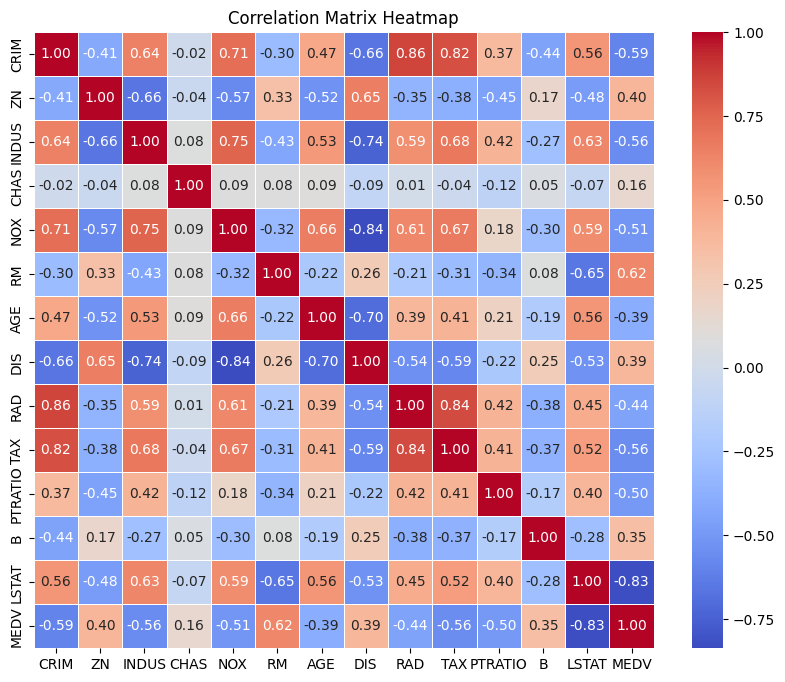

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = housing_standardized.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customization
plt.title("Correlation Matrix Heatmap")
plt.show()

How to Interpret the Heatmap?
High correlation (closer to +1 or -1) → Indicates multicollinearity.; LSTAT/MEDV, NOX/DIS, RAD/CRIM,CRIM/TAX, TAX/RAD
Low correlation (closer to 0) → Indicates weak or no linear relationship.
+VE value means variables move together
-ve value means variables have inverse rlshp
Look for pairs with correlations above ±0.7 → These may cause multicollinearity issues.LSTAT/MEDV, NOX/DIS, RAD/CRIM,CRIM/TAX,

2. use Variance Inflation Factor VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = housing_standardized.columns
vif_data["VIF"] = [variance_inflation_factor(housing_standardized.values, i) for i in range(housing_standardized.shape[1])]

# Display VIF scores
print(vif_data)

    Feature       VIF
0      CRIM  6.698047
1        ZN  2.470775
2     INDUS  3.885724
3      CHAS  1.101144
4       NOX  5.183140
5        RM  2.013004
6       AGE  2.407019
7       DIS  5.275318
8       RAD  5.818142
9       TAX  4.752470
10  PTRATIO  1.998028
11        B  1.305566
12    LSTAT  4.914894
13     MEDV  4.962800


Interpretation of VIF:

VIF < 5 → Low multicollinearity (Good) ; MEDV, LSAT,B,PTRATIO,,AGE,RM,CHAS,INDUS,ZN : ZN, CHAS, RM, AGE, PTRATIO, B, and LSTAT are fine.
VIF 5-10 → Moderate multicollinearity (Considerable) CRIM,NOX,DIS,RAD, : CRIM, NOX, DIS, RAD, and TAX have some correlation with other features.
CRIM (6.7) and RAD (5.8) are borderline, but still not severe.
VIF > 10 → High multicollinearity (May need to remove or combine variables)

# Lemme first try with PCA, if model does not generalize, i will regularization
🔹 Why Regularization (Ridge/Lasso) is Better for You
✅ Your VIF values are mostly moderate (below 10) → This suggests multicollinearity is present but not severe enough to require PCA.
✅ You don’t want to lose feature interpretability → PCA transforms features into uninterpretable components. Regularization keeps them.
✅ Regularization directly improves linear regression → Ridge shrinks correlated features instead of transforming them.

 Step 1: Standardize the Data (Needed for Ridge/Lasso)   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardizing the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing.drop(columns=['MEDV']))  # Excluding target variable

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(housing_scaled, housing['MEDV'], test_size=0.2, random_state=42)

# do i use lasso or ridge?
1. If you want to keep all features → Use Ridge Regression

Ridge Regression (Handles Multicollinearity)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Apply Ridge Regression with alpha=1 (L2 Regularization strength)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

##############
2. If you want to automatically remove less important features → Use Lasso Regression
Lasso Regression (Also Selects Important Features)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # Choose alpha carefully
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

# Check which features Lasso eliminated (coefficients close to 0)
print("Lasso Feature Coefficients:", lasso.coef_)


In [ ]:
### Using Ridge Regularization method

In [34]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler

# Standardizing the data (excluding the target variable 'MEDV') Ridge/Lasso requires data to be standardized before applying it.
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing.drop(columns=['MEDV']))

In [35]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(housing_scaled, housing['MEDV'], test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Apply Ridge Regression with alpha=1 (L2 Regularization strength)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

Ridge Regression MSE: 24.314537463956363


In [37]:
from sklearn.metrics import r2_score

# Compute R² score
r2_ridge = r2_score(y_test, y_pred)
print(f"R² Score with Ridge: {r2_pca:.4f}")

R² Score with Ridge: 0.5976


In [ ]:
### using Lassso Regularization method

In [38]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler

# Standardizing the data (excluding the target variable 'MEDV') Ridge/Lasso requires data to be standardized before applying it.
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing.drop(columns=['MEDV']))

In [39]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(housing_scaled, housing['MEDV'], test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # Choose alpha carefully
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

# Check which features Lasso eliminated (coefficients close to 0)
print("Lasso Feature Coefficients:", lasso.coef_)

Lasso Regression MSE: 25.684518308590775
Lasso Feature Coefficients: [-0.70055192  0.25661452 -0.          0.6885726  -1.55739022  3.24310432
 -0.         -2.26125359  0.66703856 -0.33847362 -1.84590977  1.02848143
 -3.62100991]


Use PCA
I would like to handle multicollinearity, by transforming correlating features to indep principal components.
PCA reduces the number of features while keeping the most important information.
PCA requires data to be standardized before applying it.

In [24]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler

# Standardizing the data (excluding the target variable 'MEDV') PCA requires data to be standardized before applying it.
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing.drop(columns=['MEDV']))

In [26]:
# Apply PCA (Retain 95% Variance)To ensure we retain most of the information, let's apply PCA while keeping 95% of the variance
from sklearn.decomposition import PCA

# Apply PCA while keeping 95% of the variance
pca = PCA(n_components=0.95)
housing_pca = pca.fit_transform(housing_scaled)

# Check how many components were retained
print(f"Number of Principal Components: {housing_pca.shape[1]}")

Number of Principal Components: 9


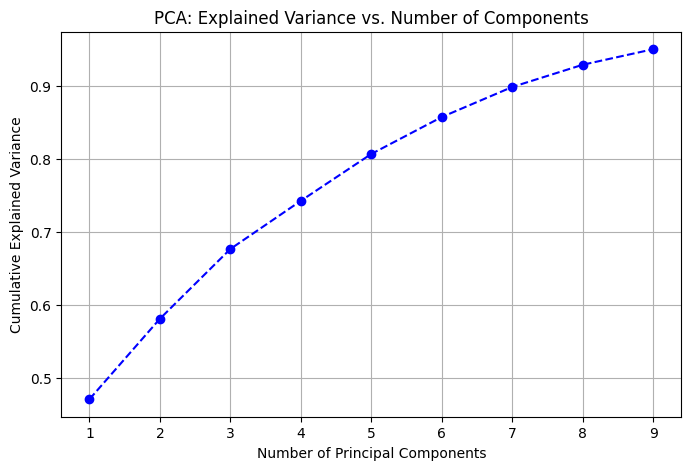

In [27]:
# Check Explained Variance
import matplotlib.pyplot as plt
import numpy as np

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.grid()
plt.show()

Use PCA-Transformed Data in Linear Regression -
Now, use the transformed PCA components for Linear Regression.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting dataset -  split data into train(80%) and test sets(20%)
X_train, X_test, y_train, y_test = train_test_split(housing_pca, housing['MEDV'], test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Extract model coeff
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with PCA: {mse}")

Intercept: 22.42713418518727
Coefficients: [-2.30745351  2.41178735  3.40890117 -1.16330553 -2.60111095 -0.67668617
 -0.10741838  1.06257339  0.22408861]
Mean Squared Error with PCA: 29.51030232608308


In [ ]:
# Intercept - Bo is the baseline value when all features = 0
# high coef show greater impact on target variable
# small coeff show littele impact on target var
# +ve coef means feature increases , y or target in this case price increases
# -ve coed means feature increases, y or target in this case price decreases

# lower mse shows a better model ie smaller error, while
# higher mse shows a better model ie higher error

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [33]:
from sklearn.metrics import r2_score

# Compute R² score
r2_pca = r2_score(y_test, y_pred)
print(f"R² Score with PCA: {r2_pca:.4f}")

R² Score with PCA: 0.5976


In [ ]:
# the above means model had moderate fit, needs improvemnet

Step 4: Compare Performance
After running the above, compare R² scores for:
1️⃣ PCA-based Linear Regression
2️⃣ Ridge Regression
3️⃣ Lasso Regression

🔹 If PCA has a lower R² than Ridge/Lasso:

Regularization is better, since PCA may have removed too much useful information.
🔹 If PCA performs similarly to Ridge/Lasso:

Either method works, and PCA can be used if you want to reduce dimensions.

In [ ]:
# From the above, Ridge had the smallest mse, hence in this case we choose it.

## Tuning

Tune Ridge Regression (Find the Best Alpha)

In [41]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Define a range of alpha values to test
alphas = np.logspace(-3, 3, 50)  # Testing values from 0.001 to 1000

# Ridge Cross-Validation to find the best alpha
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_cv.alpha_
print(f"Best Alpha for Ridge: {best_alpha}")

Best Alpha for Ridge: 6.25055192527397


Train Ridge with the Best Alpha

In [42]:
# Train Ridge with the best alpha
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train, y_train)

# Predictions
y_pred_ridge_final = ridge_final.predict(X_test)

# Evaluate Model
r2_ridge_final = r2_score(y_test, y_pred_ridge_final)
mse_ridge_final = mean_squared_error(y_test, y_pred_ridge_final)

print(f"Final Ridge R²: {r2_ridge_final:.4f}")
print(f"Final Ridge MSE: {mse_ridge_final:.4f}")

Final Ridge R²: 0.6668
Final Ridge MSE: 24.4324


Interpret Feature Importance

In [43]:
import pandas as pd

# Get feature names
feature_names = housing.drop(columns=['MEDV']).columns

# Store coefficients in a DataFrame
ridge_coeffs = pd.DataFrame({"Feature": feature_names, "Coefficient": ridge_final.coef_})
ridge_coeffs = ridge_coeffs.sort_values(by="Coefficient", ascending=False)

# Display the most and least important features
print(ridge_coeffs)

    Feature  Coefficient
5        RM     3.148256
8       RAD     1.858254
11        B     1.112048
3      CHAS     0.726433
1        ZN     0.599582
2     INDUS     0.139980
6       AGE    -0.183621
0      CRIM    -0.919665
9       TAX    -1.410190
4       NOX    -1.819887
10  PTRATIO    -1.927426
7       DIS    -2.838192
12    LSTAT    -3.549506


Interpretation:

Large positive coefficients → Important features that increase house prices, i.e RM,
Large negative coefficients → Features that lower house prices, i.e LSTAT
Small coefficients → Features with less impact (but not removed like Lasso).

Visualize Residuals - check how well the model predicts by plotting residuals.

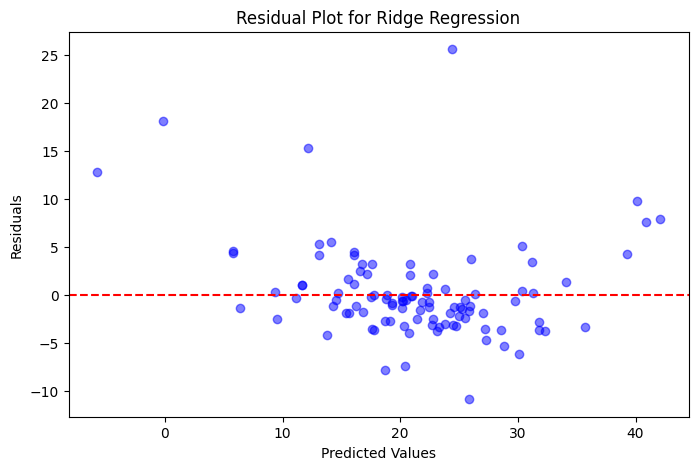

In [44]:
import matplotlib.pyplot as plt

# Compute residuals
residuals = y_test - y_pred_ridge_final

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_ridge_final, residuals, alpha=0.5, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Ridge Regression")
plt.show()

Interpretation:

Randomly scattered residuals around zero → Model is well-fitted.
Pattern in residuals → Possible non-linearity (may need feature engineering).


Did Ridge improve the R2 and MSE? before and after tuning?
Ridge Regression MSE: 24.314537463956363 -  before tuning

Final Ridge R²: 0.6668 --after tuning
Final Ridge MSE: 24.432 --after tuning

# we need higher R2 and lower Mse...hence it improved!4

 When Do You Use New Data Instead of Test Data?
🔹 New data is used for making real-world predictions after the model is finalized.
🔹 Test data is only for evaluating the model before deployment.
============================
✔ Train the model using X_train, y_train.--Done
✔ Evaluate the model using X_test, y_test (before deploying it).--Done
✔ Predict on new data after the model is finalized.--Next

In [ ]:
Lets make predictions using New Data

In [45]:
# Example: New data (replace with actual values)
new_data = pd.DataFrame({
    "CRIM": [0.02], "ZN": [18.0], "INDUS": [2.3], "CHAS": [0], "NOX": [0.5], 
    "RM": [6.5], "AGE": [30.0], "DIS": [5.0], "RAD": [1], "TAX": [300], 
    "PTRATIO": [15.0], "B": [390.0], "LSTAT": [8.0]
})

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make prediction
predicted_price = ridge_final.predict(new_data_scaled)
print(f"Predicted House Price (in $1000's): {predicted_price[0]:.2f}")

Predicted House Price (in $1000's): 27.99


In [ ]:
Predict on Multiple New Data Points

In [46]:
# Example: Multiple new data points
new_data_multiple = pd.DataFrame({
    "CRIM": [0.02, 0.1, 0.3], "ZN": [18.0, 0, 25], "INDUS": [2.3, 7.5, 5.0], 
    "CHAS": [0, 1, 0], "NOX": [0.5, 0.6, 0.4], "RM": [6.5, 5.0, 7.2], 
    "AGE": [30.0, 80.0, 20.0], "DIS": [5.0, 3.0, 6.5], "RAD": [1, 4, 2], 
    "TAX": [300, 500, 250], "PTRATIO": [15.0, 18.0, 12.0], "B": [390.0, 370.0, 400.0], 
    "LSTAT": [8.0, 15.0, 5.0]
})

# Standardize data using same scaler
new_data_multiple_scaled = scaler.transform(new_data_multiple)

# Predict
predicted_prices = ridge_final.predict(new_data_multiple_scaled)

# Add predictions to DataFrame
new_data_multiple["Predicted MEDV ($1000s)"] = predicted_prices
print(new_data_multiple)

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD  TAX  PTRATIO      B  \
0  0.02  18.0    2.3     0  0.5  6.5  30.0  5.0    1  300     15.0  390.0   
1  0.10   0.0    7.5     1  0.6  5.0  80.0  3.0    4  500     18.0  370.0   
2  0.30  25.0    5.0     0  0.4  7.2  20.0  6.5    2  250     12.0  400.0   

   LSTAT  Predicted MEDV ($1000s)  
0    8.0                27.993052  
1   15.0                17.127962  
2    5.0                35.872075  


Save Predictions

In [47]:
new_data_multiple.to_csv("ridge_predictions.csv", index=False)
print("Predictions saved successfully!")

Predictions saved successfully!


Deploying the model

In [48]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Before loading the model, make sure it was actually saved

In [50]:
import joblib

# Assuming `ridge` is your trained Ridge model
joblib.dump(ridge, "ridge_model.pkl")  # Save the Ridge model
joblib.dump(scaler, "scaler.pkl")  # Save the scaler
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [ ]:
# Verify the File Exists

In [51]:
import os

if os.path.exists("ridge_model.pkl"):
    print("Model file found! ✅")
else:
    print("Model file NOT found! ❌")

Model file found! ✅


In [ ]:
# Load the Model Correctly before running Streamlit

In [52]:
ridge_model = joblib.load("ridge_model.pkl")
scaler = joblib.load("scaler.pkl")
print("Model loaded successfully! ✅")

Model loaded successfully! ✅


In [ ]:
running Streamlit - # Create a Python script (app.py):

In [53]:
import streamlit as st
import pandas as pd
import joblib  # To load the saved model

# Load the trained Ridge model & scaler
ridge_model = joblib.load("ridge_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit UI
st.title("Boston Housing Price Prediction")
st.write("Enter the house features to predict its price:")

# User input fields
CRIM = st.number_input("Per capita crime rate (CRIM)")
ZN = st.number_input("Proportion of residential land (ZN)")
INDUS = st.number_input("Non-retail business acres (INDUS)")
CHAS = st.selectbox("Charles River (CHAS)", [0, 1])
NOX = st.number_input("Nitric oxides concentration (NOX)")
RM = st.number_input("Average number of rooms (RM)")
AGE = st.number_input("Proportion of owner-occupied units (AGE)")
DIS = st.number_input("Weighted distance to employment centers (DIS)")
RAD = st.number_input("Index of accessibility to highways (RAD)")
TAX = st.number_input("Property tax rate (TAX)")
PTRATIO = st.number_input("Pupil-teacher ratio (PTRATIO)")
B = st.number_input("Proportion of Black residents (B)")
LSTAT = st.number_input("Lower status population (LSTAT)")

# Predict function
if st.button("Predict Price"):
    user_data = pd.DataFrame([[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]],
                             columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
    user_data_scaled = scaler.transform(user_data)
    prediction = ridge_model.predict(user_data_scaled)
    st.success(f"Predicted House Price: ${prediction[0]*1000:.2f}")

2025-03-21 16:17:42.080 
  command:

    streamlit run C:\Users\joyle\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 16:17:42.080 Session state does not function when running a script without `streamlit run`


In [54]:
streamlit run C:\Users\joyle\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 16:17:42.080 Session state does not function when running a script without `streamlit run`

SyntaxError: invalid syntax (642259040.py, line 1)

In [55]:
!streamlit run ipykernel_launcher.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: ipykernel_launcher.py


In [ ]:
# Check my Current Working Directory in Jupyter

In [56]:
import os
print(os.getcwd())

C:\Users\joyle\Joyleen
